In [23]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")

using Random
Random.seed!(13)

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


MersenneTwister(UInt32[0x0000000d], Random.DSFMT.DSFMT_state(Int32[1942364238, 1073583280, 1215809738, 1073453074, -1714420386, 1073447762, -356802344, 1073021814, -1864483401, 1072881260  …  -56294547, 1072963348, 654307797, 1073646794, 598513278, -416580782, 1018899645, 745312242, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000000

In [24]:
using Statistics, LinearAlgebra, DataFrames, Plots, StatsPlots, CSV

In [25]:
# using Pkg
# Pkg.add("StatsBase")
using StatsBase
using Dates

In [26]:
rides = CSV.read("rideshare_kaggle.csv")

693071×57 DataFrame. Omitted printing of 53 columns
│ Row    │ id                                   │ timestamp │ hour  │ day   │
│        │ String                               │ Float64   │ Int64 │ Int64 │
├────────┼──────────────────────────────────────┼───────────┼───────┼───────┤
│ 1      │ 424553bb-7174-41ea-aeb4-fe06d4f4b9d7 │ 1.54495e9 │ 9     │ 16    │
│ 2      │ 4bd23055-6827-41c6-b23b-3c491f24e74d │ 1.54328e9 │ 2     │ 27    │
│ 3      │ 981a3613-77af-4620-a42a-0c0866077d1e │ 1.54337e9 │ 1     │ 28    │
│ 4      │ c2d88af2-d278-4bfd-a8d0-29ca77cc5512 │ 1.54355e9 │ 4     │ 30    │
│ 5      │ e0126e1f-8ca9-4f2e-82b3-50505a09db9a │ 1.54346e9 │ 3     │ 29    │
│ 6      │ f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2 │ 1.54507e9 │ 18    │ 17    │
│ 7      │ 462816a3-820d-408b-8549-0b39e82f65ac │ 1.54321e9 │ 5     │ 26    │
│ 8      │ 474d6376-bc59-4ec9-bf57-4e6d6faeb165 │ 1.54378e9 │ 19    │ 2     │
│ 9      │ 4f9fee41-fde3-4767-bbf1-a00e108701fb │ 1.54382e9 │ 6     │ 3     │
│ 10     │ 8612d909-98b8-4454-a093-30bd48de0cb3 │ 1.54332e9 │ 10    │ 27    │
⋮
│ 693061 │ 50a7b6be-ed2a-4a11-8d36-73bd977ad66a │ 1.54373e9 │ 5     │ 2     │
│ 693062 │ 54362c72-124b-47e8-8d07-62a07cfff624 │ 1.54373e9 │ 5     │ 2     │
│ 693063 │ 64a50889-d05b-49de-b416-1802db5c27ac │ 1.54373e9 │ 5     │ 2     │
│ 693064 │ 6c1d9207-a9af-431e-a65f-3d9d205f28bf │ 1.54373e9 │ 5     │ 2     │
│ 693065 │ 25ed29df-4f9c-4aac-8218-681427f1d738 │ 1.54373e9 │ 5     │ 2     │
│ 693066 │ 353e6566-b272-479e-a9c6-98bd6cb23f25 │ 1.54371e9 │ 23    │ 1     │
│ 693067 │ 616d3611-1820-450a-9845-a9ff304a4842 │ 1.54371e9 │ 23    │ 1     │
│ 693068 │ 633a3fc3-1f86-4b9e-9d48-2b7132112341 │ 1.54371e9 │ 23    │ 1     │
│ 693069 │ 64d451d0-639f-47a4-9b7c-6fd92fbd264f │ 1.54371e9 │ 23    │ 1     │
│ 693070 │ 727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e │ 1.54371e9 │ 23    │ 1     │
│ 693071 │ e7fdc087-fe86-40a5-a3c3-3b2a8badcbda │ 1.54371e9 │ 23    │ 1     │

In [27]:
for x in names(rides)
    rides = rides[.!((rides[:,x]) .== "NA"), :];
end

In [28]:
rides[!,:new_name] .= "tmp"
for x in 1:size(rides, 1)
    if rides[x,:name] == "Taxi"
        rides[x, :new_name] = "Taxi"
    elseif rides[x, :name] == "Shared" || rides[x, :name] == "UberPool"
        rides[x, :new_name] = "Shared Rides"
    elseif rides[x, :name] == "Lyft" || rides[x, :name] == "UberX"
        rides[x, :new_name] = "Basic"
    elseif rides[x, :name] == "Lux Black" || rides[x, :name] == "Black SUV"
        rides[x, :new_name] = "Black"
    elseif rides[x, :name] == "Lyft XL" || rides[x, :name] == "UberXL"
        rides[x, :new_name] = "XL"
    elseif rides[x, :name] == "Lux Black XL"
        rides[x, :new_name] = "Lux Black XL"
    elseif rides[x, :name] == "WAV"
        rides[x, :new_name] = "WAV"
    elseif rides[x, :name] == "Lux"
        rides[x, :new_name] = "Lux"
    end
end

In [29]:
rides[:price] = [parse(Float32,x) for x in rides[:price]] 

637976-element Array{Float32,1}:
  5.0
 11.0
  7.0
 26.0
  9.0
 16.5
 10.5
 16.5
  3.0
 27.5
 13.5
  7.0
 12.0
  ⋮
 17.0
 22.0
 14.0
 15.0
 15.0
 27.0
 17.0
  9.5
 13.0
  9.5
 27.0
 10.0

In [30]:
rides[:day_of_week] = rides[:id]
for x in 1:size(rides,1)
    t = Date(2018, rides[x,:month], rides[x, :day])
    rides[x,:day_of_week] = Dates.dayname(t);
end

rides[:,:day_of_week]

637976-element Array{String,1}:
 "Sunday"
 "Tuesday"
 "Wednesday"
 "Friday"
 "Thursday"
 "Monday"
 "Monday"
 "Sunday"
 "Monday"
 "Tuesday"
 "Friday"
 "Wednesday"
 "Friday"
 ⋮
 "Thursday"
 "Thursday"
 "Sunday"
 "Sunday"
 "Sunday"
 "Sunday"
 "Sunday"
 "Saturday"
 "Saturday"
 "Saturday"
 "Saturday"
 "Saturday"

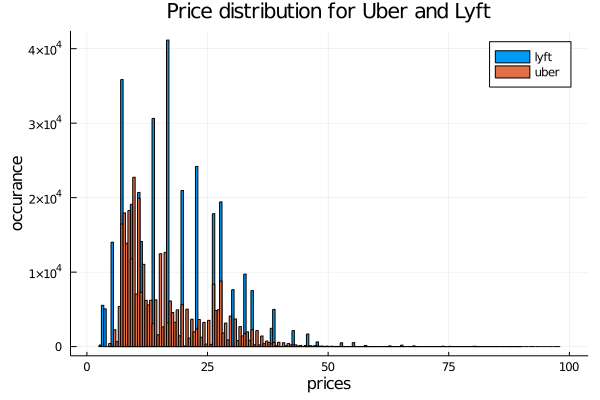

In [31]:
@df rides histogram(:price, group=:cab_type, label=["lyft" "uber"], 
    title = "Price distribution for Uber and Lyft")
ylabel!("occurance")
xlabel!("prices")

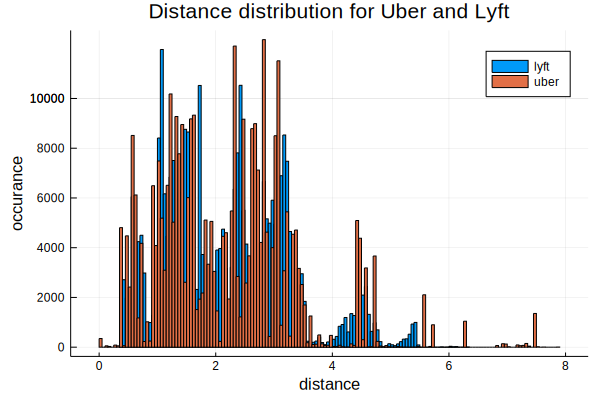

In [50]:
@df rides histogram(:distance, group=:cab_type, label=["lyft" "uber"], 
    title = "Distance distribution for Uber and Lyft")
ylabel!("occurance")
xlabel!("distance")

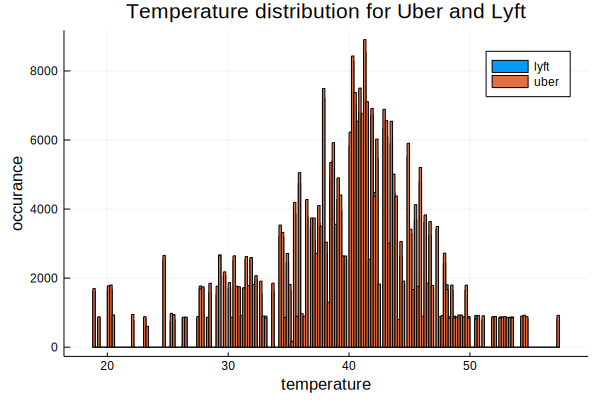

In [62]:
@df rides histogram(:temperature, group=:cab_type, label=["lyft" "uber"], 
    title = "Temperature distribution for Uber and Lyft")
ylabel!("occurance")
xlabel!("temperature")

Standardize the values of real features

In [32]:
labels = [
    :price
    :distance
    :temperature
    :windSpeed
    :humidity
    :visibility
]
for x in labels
    X = rides[:, x]
    dt = fit(ZScoreTransform, X, dims=1)
    rides[:, x] = StatsBase.transform(dt, X)
end

In [33]:
maximum(rides[:price])

8.682085f0

In [58]:
lyftrides = rides[in(["Lyft"]).(rides.cab_type), :]
uberrides = rides[in(["Uber"]).(rides.cab_type), :]

330568×59 DataFrame. Omitted printing of 53 columns
│ Row    │ id       │ timestamp │ hour  │ day   │ month │ datetime            │
│        │ String   │ Float64   │ Int64 │ Int64 │ Int64 │ String              │
├────────┼──────────┼───────────┼───────┼───────┼───────┼─────────────────────┤
│ 1      │ Sunday   │ 1.54379e9 │ 23    │ 2     │ 12    │ 2018-12-02 23:13:01 │
│ 2      │ Tuesday  │ 1.54329e9 │ 3     │ 27    │ 11    │ 2018-11-27 03:39:22 │
│ 3      │ Sunday   │ 1.54498e9 │ 17    │ 16    │ 12    │ 2018-12-16 17:15:14 │
│ 4      │ Tuesday  │ 1.54511e9 │ 6     │ 18    │ 12    │ 2018-12-18 06:20:05 │
│ 5      │ Friday   │ 1.54359e9 │ 15    │ 30    │ 11    │ 2018-11-30 15:43:02 │
│ 6      │ Thursday │ 1.54347e9 │ 6     │ 29    │ 11    │ 2018-11-29 06:49:52 │
│ 7      │ Monday   │ 1.54326e9 │ 18    │ 26    │ 11    │ 2018-11-26 18:47:09 │
│ 8      │ Tuesday  │ 1.54509e9 │ 0     │ 18    │ 12    │ 2018-12-18 00:45:07 │
│ 9      │ Tuesday  │ 1.54514e9 │ 13    │ 18    │ 12    │ 2018-12-18 13:30:08 │
│ 10     │ Saturday │ 1.54491e9 │ 22    │ 15    │ 12    │ 2018-12-15 22:35:04 │
⋮
│ 330558 │ Sunday   │ 1.54379e9 │ 23    │ 2     │ 12    │ 2018-12-02 23:27:56 │
│ 330559 │ Monday   │ 1.54506e9 │ 14    │ 17    │ 12    │ 2018-12-17 14:35:07 │
│ 330560 │ Thursday │ 1.54345e9 │ 0     │ 29    │ 11    │ 2018-11-29 00:33:40 │
│ 330561 │ Sunday   │ 1.54372e9 │ 3     │ 2     │ 12    │ 2018-12-02 03:48:04 │
│ 330562 │ Sunday   │ 1.54495e9 │ 8     │ 16    │ 12    │ 2018-12-16 08:55:04 │
│ 330563 │ Tuesday  │ 1.54329e9 │ 3     │ 27    │ 11    │ 2018-11-27 03:48:22 │
│ 330564 │ Monday   │ 1.54386e9 │ 19    │ 3     │ 12    │ 2018-12-03 19:18:02 │
│ 330565 │ Tuesday  │ 1.54332e9 │ 10    │ 27    │ 11    │ 2018-11-27 10:42:21 │
│ 330566 │ Tuesday  │ 1.5433e9  │ 5     │ 27    │ 11    │ 2018-11-27 05:33:21 │
│ 330567 │ Monday   │ 1.54506e9 │ 14    │ 17    │ 12    │ 2018-12-17 14:40:03 │
│ 330568 │ Monday   │ 1.54503e9 │ 6     │ 17    │ 12    │ 2018-12-17 06:55:12 │

Create train/test split

In [72]:
function split(rides)
    #rides = rides[.!(ismissing.(rides[!, :price])), :]; # only consider the examples for which the price is known(just in case not cleaned)
    rides = rides[shuffle(1:end), :] # we shuffle the data so that our train/test split will be truly random
    feature_names = names(rides) # names of all feature

    train_proportion = 0.8
    n = size(rides, 1) #number of data
    println("Size of dataset: ", string(n))

    # Put the first ntrain observations in the DataFrame rides into the training set, and the rest into the test set
    ntrain = convert(Int, round(train_proportion*n))

    target = rides[:, :price]
    data = rides[:, filter(col -> (col != :price), feature_names)]

    # the following variable records the features of examples in the training set
    train_x = data[1:ntrain,:]
    # the following variable records the features of examples in the test set
    test_x = data[ntrain+1:n,:]
    # the following variable records the labels of examples in the training set
    train_y = target[1:ntrain,:]
    # the following variable records the labels of examples in the test set
    test_y = target[ntrain+1:n,:]
    return train_x, test_x, train_y, test_y, ntrain, n
end

split (generic function with 1 method)

In [73]:
train_xL, test_xL, train_yL, test_yL, ntrainL, nL = split(lyftrides)
train_xU, test_xU, train_yU, test_yU, ntrainU, nU = split(uberrides)

Size of dataset: 307408
Size of dataset: 330568


(264454×59 DataFrame. Omitted printing of 53 columns
│ Row    │ id        │ timestamp │ hour  │ day   │ month │ datetime            │
│        │ String    │ Float64   │ Int64 │ Int64 │ Int64 │ String              │
├────────┼───────────┼───────────┼───────┼───────┼───────┼─────────────────────┤
│ 1      │ Wednesday │ 1.54344e9 │ 22    │ 28    │ 11    │ 2018-11-28 22:11:07 │
│ 2      │ Friday    │ 1.54476e9 │ 3     │ 14    │ 12    │ 2018-12-14 03:55:08 │
│ 3      │ Monday    │ 1.54501e9 │ 0     │ 17    │ 12    │ 2018-12-17 00:20:06 │
│ 4      │ Friday    │ 1.54356e9 │ 7     │ 30    │ 11    │ 2018-11-30 07:43:06 │
│ 5      │ Wednesday │ 1.5434e9  │ 9     │ 28    │ 11    │ 2018-11-28 09:56:07 │
│ 6      │ Thursday  │ 1.54352e9 │ 20    │ 29    │ 11    │ 2018-11-29 20:02:58 │
│ 7      │ Monday    │ 1.54504e9 │ 11    │ 17    │ 12    │ 2018-12-17 11:00:09 │
│ 8      │ Saturday  │ 1.54368e9 │ 16    │ 1     │ 12    │ 2018-12-01 16:28:03 │
│ 9      │ Thursday  │ 1.54348e9 │ 8     │ 29    │ 11   

In [92]:
### whole dataset ###
train_x, test_x, train_y, test_y, ntrain, n = split(rides)

Size of dataset: 637976


(510381×59 DataFrame. Omitted printing of 53 columns
│ Row    │ id        │ timestamp │ hour  │ day   │ month │ datetime            │
│        │ String    │ Float64   │ Int64 │ Int64 │ Int64 │ String              │
├────────┼───────────┼───────────┼───────┼───────┼───────┼─────────────────────┤
│ 1      │ Tuesday   │ 1.5439e9  │ 6     │ 4     │ 12    │ 2018-12-04 06:13:02 │
│ 2      │ Thursday  │ 1.54346e9 │ 2     │ 29    │ 11    │ 2018-11-29 02:09:19 │
│ 3      │ Tuesday   │ 1.54329e9 │ 3     │ 27    │ 11    │ 2018-11-27 03:57:22 │
│ 4      │ Tuesday   │ 1.54334e9 │ 16    │ 27    │ 11    │ 2018-11-27 16:33:22 │
│ 5      │ Monday    │ 1.54504e9 │ 10    │ 17    │ 12    │ 2018-12-17 10:20:11 │
│ 6      │ Sunday    │ 1.545e9   │ 21    │ 16    │ 12    │ 2018-12-16 21:25:13 │
│ 7      │ Monday    │ 1.54508e9 │ 20    │ 17    │ 12    │ 2018-12-17 20:05:07 │
│ 8      │ Thursday  │ 1.54467e9 │ 3     │ 13    │ 12    │ 2018-12-13 03:35:10 │
│ 9      │ Monday    │ 1.54508e9 │ 19    │ 17    │ 12   

First look at real valued features

In [35]:
labels_real = [
    :distance
    :temperature
    :windSpeed
    :humidity
    :visibility
]

5-element Array{Symbol,1}:
 :distance
 :temperature
 :windSpeed
 :humidity
 :visibility

In [70]:
# Lyft
# the following variable should have as many columns as real variables, and as many rows as examples in the training set      
train_vals_realL = convert(Matrix,train_xL[:,labels_real])
# the following variable should have as many columns as real variables, and as many rows as examples in the test set      
test_vals_realL = convert(Matrix,test_xL[:,labels_real])

# Uber
# the following variable should have as many columns as real variables, and as many rows as examples in the training set      
train_vals_realU = convert(Matrix,train_xU[:,labels_real])
# the following variable should have as many columns as real variables, and as many rows as examples in the test set      
test_vals_realU = convert(Matrix,test_xU[:,labels_real])

66114×5 Array{Float64,2}:
  0.467441     -0.0256347   0.610957  -0.368434    0.586826
 -0.695131      0.832294   -0.2563     1.36348    -0.01429
 -1.43495       1.86121    -0.596214   1.50781    -1.75845
  0.000650776  -0.601057   -0.278537  -0.0797815   0.562612
  0.000650776  -1.14674    -0.666103   0.569686    0.468063
 -0.483754      0.332703    1.0557    -0.0797815   0.584904
  1.10157      -1.33855    -1.26651    0.42536     0.546854
 -1.0122        0.152791    0.792033   1.21915    -2.24465
 -0.976967      0.564656    1.88484    1.07483    -1.61278
  0.625974     -0.260561    1.49092    1.21915    -2.04863
  0.590744      0.0739862   1.35432    1.14699    -2.26156
 -0.950545      0.927454   -0.513618  -1.66737     0.54916
 -0.906508     -0.208521    0.741204  -0.296271    0.588363
  ⋮                                               
  0.379368     -1.56009    -1.16168    0.858338    0.561843
  0.749277      0.063578   -0.761406  -0.945738    0.564534
 -0.739168      0.551274    1.

In [93]:
### whole dataset ###

# the following variable should have as many columns as real variables, and as many rows as examples in the training set      
train_vals_real = convert(Matrix,train_x[:,labels_real])
# the following variable should have as many columns as real variables, and as many rows as examples in the test set      
test_vals_real = convert(Matrix,test_x[:,labels_real])

127595×5 Array{Float64,2}:
 -0.739168   -1.26123    -1.43806    -0.224108     0.530327
 -1.44376     0.375822    0.340932   -0.296271     0.503423
  0.916617    0.332703    1.0557     -0.0797815    0.584904
 -0.659902   -1.29543    -1.34593    -0.296271     0.5138
 -0.589443    0.126027    0.919103   -0.729249     0.588363
 -0.976967   -0.24718     0.664962   -0.224108     0.581061
 -0.844857    0.396639    0.531538   -0.00761847   0.268972
  0.0270729   0.928941   -0.624805    1.00266     -0.140355
  1.41864    -0.0256347   0.610957   -0.368434     0.586826
 -0.924123    0.551274    1.5354      1.14699     -2.22389
 -1.29403    -0.737849   -1.14262     0.208871     0.56415
  0.70524    -1.15715    -1.29828     0.641849     0.588363
 -1.12669     0.120079    0.941341    1.21915     -2.02442
  ⋮                                               
  0.485056    0.106697   -0.36431    -0.296271     0.588363
 -1.43495     0.274715   -0.780466    0.353197     0.479209
  0.978269   -2.21135     2

Produce our training features, use the real valued features with an offset. 

In [75]:
### don't need this ###
# Lyft
Xtrain_realL = hcat(train_vals_realL, ones(ntrainL))
Xtest_realL = hcat(test_vals_realL, ones(nL-ntrainL))

# Uber
Xtrain_realU = hcat(train_vals_realU, ones(ntrainU))
Xtest_realU = hcat(test_vals_realU, ones(nU-ntrainU))

66114×6 Array{Float64,2}:
  0.467441     -0.0256347   0.610957  -0.368434    0.586826  1.0
 -0.695131      0.832294   -0.2563     1.36348    -0.01429   1.0
 -1.43495       1.86121    -0.596214   1.50781    -1.75845   1.0
  0.000650776  -0.601057   -0.278537  -0.0797815   0.562612  1.0
  0.000650776  -1.14674    -0.666103   0.569686    0.468063  1.0
 -0.483754      0.332703    1.0557    -0.0797815   0.584904  1.0
  1.10157      -1.33855    -1.26651    0.42536     0.546854  1.0
 -1.0122        0.152791    0.792033   1.21915    -2.24465   1.0
 -0.976967      0.564656    1.88484    1.07483    -1.61278   1.0
  0.625974     -0.260561    1.49092    1.21915    -2.04863   1.0
  0.590744      0.0739862   1.35432    1.14699    -2.26156   1.0
 -0.950545      0.927454   -0.513618  -1.66737     0.54916   1.0
 -0.906508     -0.208521    0.741204  -0.296271    0.588363  1.0
  ⋮                                                          ⋮
  0.379368     -1.56009    -1.16168    0.858338    0.561843  1.0
 

Fit the linear model, compute and print the MSE, and plot the predicted versus the real data. 

In [94]:
"""This function just computes the mean squared error."""
function MSE(y, pred)
    return mean((y - pred).^2)
end

"""This function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

"""This helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false,data_label="data")
    scatter(x,y, label=data_label)
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This function plots the predicted labels vs the actual labels
(We only plots the first 10000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 10000)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (\$)", "True (\$)", zeromin=true)
end

plot_pred_true

In [24]:
### don't need this ###
# The weights of the linear equation (compute via least squares)
# Hasn't split between Uber and Lyft but since this only considered real valued features probably won't be needed
w = Xtrain_real\train_y
print("weights when only considering real valued features: ", '\n',w)

train_pred = Xtrain_real*w
test_pred = Xtest_real*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

weights when only considering real valued features: 
[0.3460778392056164; -0.00018570428440778692; 0.00028140506540973474; -7.389861455729411e-6; -0.00029504197504546696; 0.00044102593274141395]

0.8778718709763312

MSE of train dataset and test dataset:

Train MSE	0.8816984373814963
Test MSE 	0.8778718709763312


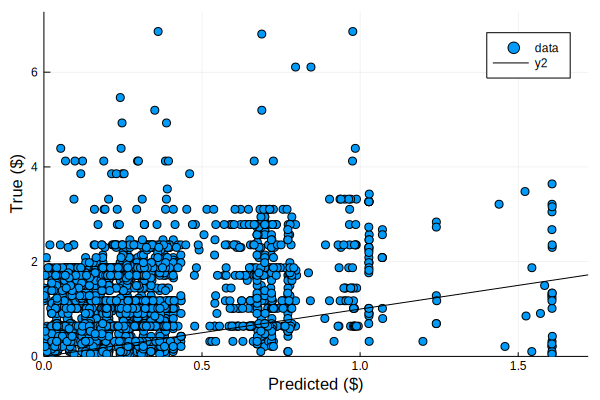

In [25]:
### don't need this ###
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

Add in boolean and categorical data

In [107]:
cat_labels = [
  :new_name
  :day_of_week
]

cats_sets = [unique(train_x[:, label]) for label in cat_labels]
function onehot(column, cats=unique(column))
    result = zeros(size(column, 1), size(cats,1))
    for i in 1:size(column, 1)
        for j in 1:size(cats,1)
            if column[i] == cats[j]
                result[i,j] = 1
            end
        end
    end
    result
end

# Lyft
train_cat_valsL = hcat([onehot(train_xL[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...)
test_cat_valsL = hcat([onehot(test_xL[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...) 

# Uber
train_cat_valsU = hcat([onehot(train_xU[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...)
test_cat_valsU = hcat([onehot(test_xU[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...) 



66114×15 Array{Float64,2}:
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.

In [96]:
### whole dataset ###
cat_labels = [
  :new_name
  :day_of_week
    :cab_type
]

cats_sets = [unique(train_x[:, label]) for label in cat_labels]
train_cat_vals = hcat([onehot(train_x[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...)
test_cat_vals = hcat([onehot(test_x[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...) 

127595×17 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     1.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [97]:
cats_sets

3-element Array{Array{String,1},1}:
 ["XL", "Basic", "tmp", "WAV", "Lux", "Black", "Shared Rides", "Lux Black XL"]
 ["Tuesday", "Thursday", "Monday", "Sunday", "Friday", "Saturday", "Wednesday"]
 ["Lyft", "Uber"]

In [108]:
# concatenate the real and boolean/categorical features to form X matrix

# Lyft
XtrainL = hcat(train_vals_realL,train_cat_valsL,ones(ntrainL))
XtestL = hcat(test_vals_realL,test_cat_valsL,ones(nL-ntrainL))


# Uber
XtrainU = hcat(train_vals_realU,train_cat_valsU,ones(ntrainU))
XtestU = hcat(test_vals_realU,test_cat_valsU,ones(nU-ntrainU))


66114×21 Array{Float64,2}:
  0.467441     -0.0256347   0.610957  …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 -0.695131      0.832294   -0.2563       0.0  0.0  0.0  1.0  0.0  0.0  1.0
 -1.43495       1.86121    -0.596214     0.0  0.0  1.0  0.0  0.0  0.0  1.0
  0.000650776  -0.601057   -0.278537     0.0  0.0  0.0  0.0  0.0  1.0  1.0
  0.000650776  -1.14674    -0.666103     0.0  1.0  0.0  0.0  0.0  0.0  1.0
 -0.483754      0.332703    1.0557    …  0.0  0.0  0.0  1.0  0.0  0.0  1.0
  1.10157      -1.33855    -1.26651      0.0  0.0  0.0  0.0  1.0  0.0  1.0
 -1.0122        0.152791    0.792033     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 -0.976967      0.564656    1.88484      0.0  0.0  0.0  0.0  0.0  1.0  1.0
  0.625974     -0.260561    1.49092      0.0  1.0  0.0  0.0  0.0  0.0  1.0
  0.590744      0.0739862   1.35432   …  0.0  0.0  1.0  0.0  0.0  0.0  1.0
 -0.950545      0.927454   -0.513618     0.0  0.0  1.0  0.0  0.0  0.0  1.0
 -0.906508     -0.208521    0.741204     0.0  0.0  0.0  0.0  1.0  0.0  1.

In [98]:
### whole dataset ###
Xtrain = hcat(train_vals_real,train_cat_vals,ones(ntrain))
Xtest = hcat(test_vals_real,test_cat_vals,ones(n-ntrain))

w = Xtrain\train_y
print("weights when considering real/boolean/categorical features: ", '\n',w)

train_pred = Xtrain*w
test_pred = Xtest*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

weights when considering real/boolean/categorical features: 
[0.3453418546370236; 0.00014830165542137198; 0.000670090265430627; -0.0012129434458802955; -0.00041370785045262225; -0.20704374609287188; -0.830321805759913; 0.19560336871782508; -0.9579745652596974; 0.18063018459152963; 1.0045329316182772; -1.072386599851442; 1.7420908397706318; 0.008572511336017219; 0.006402825415613255; 0.009704255122269611; 0.006261865773571472; 0.006546447735177213; 0.009265902475925696; 0.008376799875766644; -0.11242226895381566; 0.1675528766881568; 0.055130607734341114]

0.12322932805738342

In [105]:
# The weights of the linear equation (compute via least squares)

### Lyft ###
wL = XtrainL\train_yL
print("weights when considering real/boolean/categorical features: ", '\n',wL)

train_predL = XtrainL*wL
test_predL = XtestL*wL

train_MSEL = MSE(train_yL,train_predL)
test_MSEL = MSE(test_yL,test_predL)

weights when considering real/boolean/categorical features: 
[-0.0012461550668028656; 0.0013412824154352757; -0.00018203243313313344; -0.0003877644337368751; 0.0031180420177576735; 0.009775253987931299; 0.018497696962782285; 0.0018302667941970628; 0.013341931829675167; 0.010917366433903102; 0.01527321434511816; 0.006170732392178056; 0.07580646274578513]

1.1417425746164214

Train MSE for Lyft	1.1577498391148953
Test MSE for Lyft	1.1417425746164214


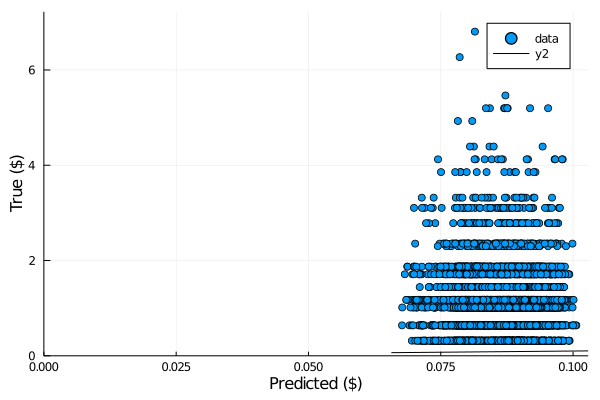

In [106]:
println("Train MSE for Lyft\t", train_MSEL)
println("Test MSE for Lyft\t", test_MSEL)

plot_pred_true(test_predL, test_yL)

In [88]:
# The weights of the linear equation (compute via least squares)

### Uber ###
wU = XtrainU\train_yU
print("weights when considering real/boolean/categorical features: ", '\n',wU)

train_predU = XtrainU*wU
test_predU = XtestU*wU

train_MSEU = MSE(train_yU,train_predU)
test_MSEU = MSE(test_yU,test_predU)

weights when considering real/boolean/categorical features: 
[-0.0013076095823434746; -0.0008423362383564314; 0.00019651447438462044; -0.0006737035138791795; -0.001805875645065329; 1.6217739252434153; 0.0; -0.6861601376560852; -0.5770964880431476; 0.05589451072864139; 0.0; -0.021077251901235654; -0.02105089860795429; -0.01722103082041755; -0.014242723343740396; -0.026593546272941054; -0.017737490102009153; -0.013360288184996624; -0.13128322923329466]

0.27312723427716346

Train MSE for Uber	0.2739704982106973
Test MSE for Uber	0.27312723427716346


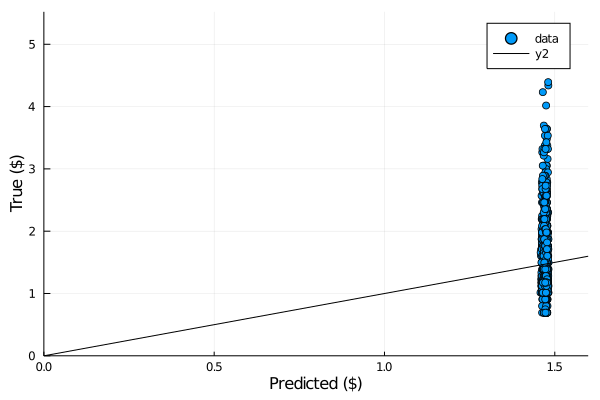

In [89]:
println("Train MSE for Uber\t", train_MSEU)
println("Test MSE for Uber\t", test_MSEU)

plot_pred_true(test_predU, test_yU)

With color differentiate lyft and uber:

In [31]:
no_lyft = []
no_uber = []

for i in 1:size(Xtest)[1]
    if Xtest[i,18]==1
        append!(no_lyft,i)
    else
        append!(no_uber,i)
    end
end
        
X_lyft=Xtest[no_lyft,:]
X_uber=Xtest[no_uber,:]

test_pred_lyft = X_lyft*w #prediction of lyft
test_pred_uber = X_uber*w #prediction of uber

test_y_lyft = test_y[no_lyft,:] #true value of lyft
test_y_uber = test_y[no_uber,:] #true value of uber

65989×1 Array{Float32,2}:
 -0.7019385
 -0.7019385
  1.1212434
 -0.9164305
  1.0139973
 -1.0236765
 -1.0236765
  1.2821122
 -0.9700535
  0.53139037
 -1.1845455
  0.4241444
  0.79950535
  ⋮
 -0.5946925
 -0.75556153
  0.2096524
 -1.0236765
 -0.6483155
  0.10240641
  1.0139973
 -0.9164305
 -0.48744655
 -0.6483155
  2.4618182
  0.5850134

Together in one graph

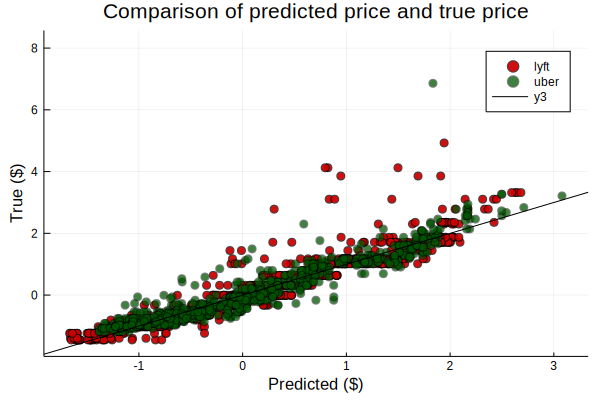

In [64]:
scatter(test_pred_lyft[1:1000], test_y_lyft[1:1000], label="lyft",color=:red,markeralpha=0.75)
scatter!(test_pred_uber[1:1000], test_y_uber[1:1000], label="uber",color=:green,markeralpha=0.5,
title="Comparison of predicted price and true price")

xlabel!("Predicted (\$)")
ylabel!("True (\$)")
x=test_pred
y=test_y
margin=.05
range_y = maximum(y) - minimum(y)
range_x = maximum(x) - minimum(x)
plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)

ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))



In [45]:
# proxgrad
include("proxgrad.jl")
Pkg.add("LowRankModels")
Pkg.update("LowRankModels")
Pkg.status("LowRankModels")
using LowRankModels

loss = 1/n*QuadLoss()

# we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
λ = .1
reg = λ*QuadReg()

# minimize 1/n ||Xw - y||^2 + λ||w||^2
w = proxgrad(loss, reg, Xtrain, train_y, maxiters=5)

train_pred = Xtrain*w
test_pred = Xtest*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [15d4e49f] ~ LowRankModels v1.1.1 `https://github.com/madeleineudell/LowRankModels.jl.git#master` ⇒ v1.1.1
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [15d4e49f] ~ LowRankModels v1.1.1 `https://github.com/madeleineudell/LowRankModels.jl.git#master` ⇒ v1.1.1
   Updating registry at `~/.julia/registries/General`
  Installed Formatting ───────────── v0.4.2
  Installed FiniteDiff ───────────── v2.7.2
  Installed NearestNeighbors ─────── v0.4.8
  Installed Tables ───────────────── v1.2.2
  Installed Contour ──────────────── v0.5.7
  Installed OffsetArrays ─────────── v1.4.1
  Installed GeometryBasics ───────── v0.3.4
  Installed Latexify ─────────────── v0.14.6
  Installed Compat ───────────────── v3.24.0
  Installed DiffResults ──────────── v1.0.3
  Installed ArrayInterface ───────── v2.14.4
  Installed PlotUtils ────────────── v1.0.8
  Installed Parsers ──────────────── v1.0.15
  Installed Posit

Status `~/.julia/environments/v1.5/Project.toml`
  [15d4e49f] LowRankModels v1.1.1


LoadError: MethodError: no method matching evaluate(::QuadLoss, ::Array{Float64,1}, ::Array{Float32,2})
Closest candidates are:
  evaluate(::Union{ClassificationLoss, DiffLoss}, ::Array{var"#s39",1} where var"#s39"<:Real, !Matched::AbstractArray{T,1} where T) at /Users/shelleyli/.julia/packages/LowRankModels/YZgma/src/losses.jl:633
  evaluate(::Loss, ::Array{var"#s39",1} where var"#s39"<:Real, !Matched::AbstractArray{T,1} where T) at /Users/shelleyli/.julia/packages/LowRankModels/YZgma/src/losses.jl:623
  evaluate(!Matched::NonNegOneReg, ::AbstractArray) at /Users/shelleyli/.julia/packages/LowRankModels/YZgma/src/regularizers.jl:129
  ...

Train MSE	0.12234467130570233
Test MSE 	0.12190599721771522


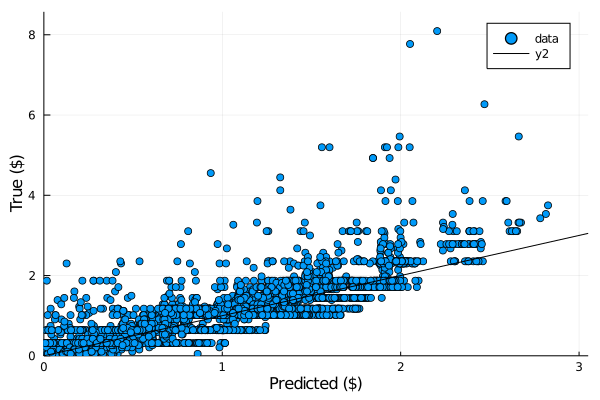

In [46]:
# svd
### whole dataset ###
U,σ,V = svd(Xtrain)
# solve least squares problem to estimate w
w = V*diagm(σ.^(-1))*U'*train_y

train_pred = Xtrain*w
test_pred = Xtest*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

Train MSE for Lyft	0.29528534993144506
Test MSE for Lyft	0.2864615214527684


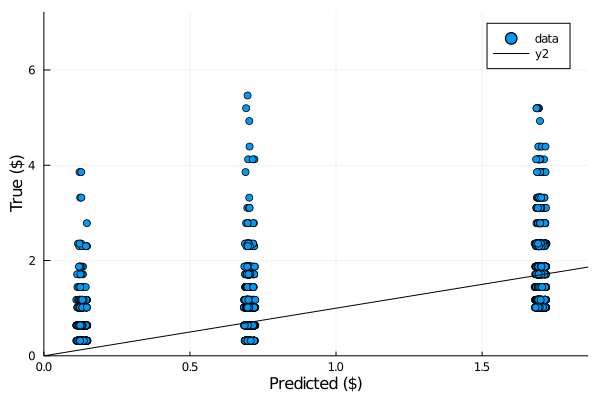

In [109]:
# svd
# Lyft 
U,σ,V = svd(XtrainL)
# solve least squares problem to estimate w
wL = V*diagm(σ.^(-1))*U'*train_yL

train_predL = XtrainL*wL
test_predL = XtestL*wL

train_MSEL = MSE(train_yL,train_predL)
test_MSEL = MSE(test_yL,test_predL)

println("Train MSE for Lyft\t", train_MSEL)
println("Test MSE for Lyft\t", test_MSEL)

plot_pred_true(test_predL, test_yL)

In [ ]:
# low rank model